<a href="https://colab.research.google.com/github/Nordoken/Assignment---Income-inequality-in-relation-to-GDP/blob/main/InequalityRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving inequality.csv to inequality.csv
Saving gdp-per-capita-worldbank.csv to gdp-per-capita-worldbank.csv


In [ ]:
print(gdp_df.head())
print(inequality_df.head())


In [ ]:

gdp_df = pd.read_csv('gdp-per-capita-worldbank.csv')
inequality_df = pd.read_csv('inequality.csv')

print("Columns in gdp_df:", gdp_df.columns)
print("Columns in inequality_df:", inequality_df.columns)


In [ ]:
missing_values_gdp = gdp_df.isnull().sum()
print("Missing values in gdp_df:")
print(missing_values_gdp)

missing_values_inequality = inequality_df.isnull().sum()
print("\nMissing values in inequality_df:")
print(missing_values_inequality)


In [ ]:
gdp_df.drop(columns=['Code'], inplace=True)
inequality_df.dropna(inplace=True)

print("Shape of gdp_df after dropping 'Code' column:", gdp_df.shape)
print("Shape of inequality_df after dropping rows with missing values:", inequality_df.shape)


In [ ]:
print("Columns in gdp_df:", gdp_df.columns)
print("Columns in inequality_df:", inequality_df.columns)


In [ ]:
combined_df = pd.merge(gdp_df, inequality_df, how='inner', left_on=['Entity', 'Year'], right_on=['Country', 'Year'])
print("Combined DataFrame:")
print(combined_df.head())


In [ ]:
correlation = combined_df['GDP per capita, PPP (constant 2017 international $)'].corr(combined_df['Gini coefficient (before tax) (World Inequality Database)'])
print("Correlation coefficient between GDP per capita and Gini coefficient:", correlation)


Correlation coefficient between GDP per capita and Gini coefficient: -0.19679693169915569


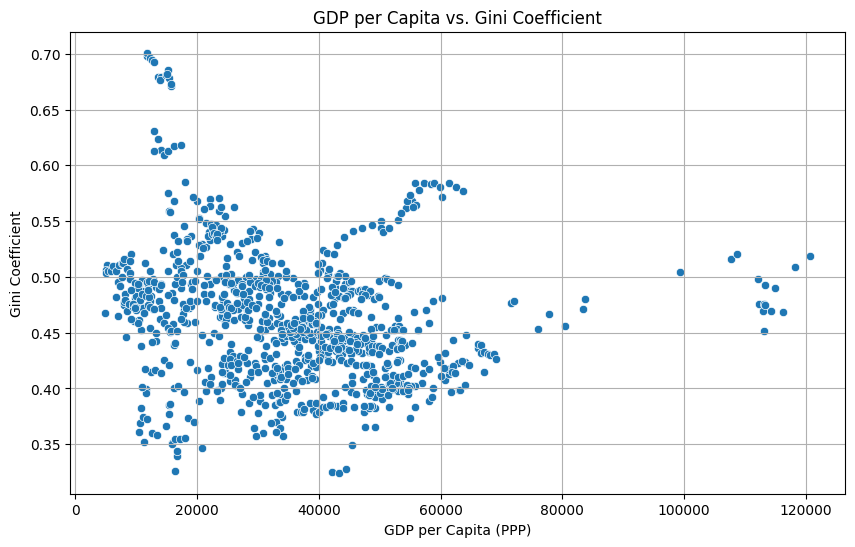

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='GDP per capita, PPP (constant 2017 international $)', y='Gini coefficient (before tax) (World Inequality Database)')
plt.title('GDP per Capita vs. Gini Coefficient')
plt.xlabel('GDP per Capita (PPP)')
plt.ylabel('Gini Coefficient')
plt.grid(True)
plt.show()


In [ ]:
pearson_corr, _ = pearsonr(combined_df['GDP per capita, PPP (constant 2017 international $)'],
                           combined_df['Gini coefficient (before tax) (World Inequality Database)'])

print("Pearson correlation coefficient:", pearson_corr)


Pearson correlation coefficient: -0.1967969316991558


The analysis reveals a weak negative correlation between a country's Gross Domestic Product (GDP) and its income inequality, as indicated by the Pearson correlation coefficient of approximately -0.197. This suggests that there is a slight tendency for income inequality to decrease as GDP per capita increases, and vice versa